# Creating a weather Index

Import the required modules.

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

Read the csv containing the city temperature data. The data comes from "the University of Dayton - Environmental Protection Agency Average Daily Temperature Archive". Access the data here: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities?resource=download. It was accessed and downloaded on 21/10/2022.

In [26]:
read_temp_path = Path("__file__").parent.joinpath("Raw_Data", "Weather_Data").parent.joinpath("Weather_Data", "city_temperature.csv")
df = pd.read_csv(read_temp_path)
#print(read_temp_path)

C:\Users\rafir\AppData\Local\Temp\ipykernel_22768\3101557854.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(read_temp_path)


Have a look at the data

In [27]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


Clean the data so we only use cities in Europe and  after 2012. Also compile the month, day and year columns into one date column and then drop all extra columns such as state, month, day and year.

In [28]:
df = df[(df.Region == "Europe") & (df.Year >= 2012)]  
cols=["Month","Day","Year"]
df['Date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['Date']=pd.to_datetime(df['Date'])
df = df.drop(df.columns[[2,4,5,6]], axis = 1)
df.head()

C:\Users\rafir\AppData\Local\Temp\ipykernel_22768\3588276134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


,Region,Country,City,AvgTemperature,Date
629586,Europe,Albania,Tirana,34.9,2012-01-01
629587,Europe,Albania,Tirana,39.1,2012-01-02
629588,Europe,Albania,Tirana,43.0,2012-01-03
629589,Europe,Albania,Tirana,44.1,2012-01-04
629590,Europe,Albania,Tirana,49.7,2012-01-05


Restrict the dataset to just countries involved in the EU ETS. I then sorted the data by date and country.

In [29]:
EU_Countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia',  'Czech Republic', 'Denmark',  'Finland', 'France', 'Germany', 
'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'The Netherlands', 'Poland', 'Portugal', 'Romania', 
'Slovakia',  'Spain', 'Sweden',  'Norway']


df = df[df.Country.isin(EU_Countries)]
df = df.sort_values(by = ["Date", "Country"])
df.head()

,Region,Country,City,AvgTemperature,Date
638852,Europe,Austria,Vienna,33.1,2012-01-01
657382,Europe,Belgium,Brussels,53.9,2012-01-01
666648,Europe,Bulgaria,Sofia,28.4,2012-01-01
675914,Europe,Croatia,Zagreb,34.5,2012-01-01
690831,Europe,Czech Republic,Prague,42.5,2012-01-01


Take a mean of the temperature across each country. Sort by date.

In [30]:
df = df.groupby([df.Country, df.Date]).mean().reset_index()
df.head()

,Country,Date,AvgTemperature
0,Austria,2012-01-01,33.1
1,Austria,2012-01-02,34.5
2,Austria,2012-01-03,43.3
3,Austria,2012-01-04,41.1
4,Austria,2012-01-05,41.7


Save this data to a csv if you wish.

In [31]:
write_temp_path = Path("__file__").parent.joinpath("Manipulated_Data", "Weather_Data").parent.joinpath("Weather_Data", "Grouped EU Weather.csv")
df.to_csv(write_temp_path)

Now import a new database. This is downloaded from https://ec.europa.eu/eurostat/databrowser/view/tps00001/settings_1/table?lang=en. It was accessed and downloaded on the 24/10/2022. It details the population of all the European countries at the start of each year. 

In [32]:
read_pop_path = Path("__file__").parent.joinpath("Raw_Data", "Weather_Data").parent.joinpath("Weather_Data", "Population Data.csv")
pop_df = pd.read_excel("C:\python\Weather_Data\Population Data.xlsx", sheet_name = "Sheet2", header = 0, index_col = False)

In [33]:
pop_df.head()

,Date,Albania,Andorra,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,2012-01-01,2903008,78115,3274285,8408121,9235085,9465150,11075889,3839265,7327224,...,33376,7216649,5404322,2055496,46818219,9482855,7954662,74724269,45453282,63495088
1,2013-01-01,2897770,76246,3026878,8451860,9356483,9463840,11137974,3835645,7284552,...,33562,7181505,5410836,2058821,46727890,9555893,8039060,75627384,45372692,63905342
2,2014-01-01,2892394,:,3017079,8507786,9477119,9468154,11180840,3830911,7245677,...,32520,7146759,5415949,2061085,46512199,9644864,8139631,76667864,45245894,64351203
3,2015-01-01,2885796,:,3010598,8584926,9593038,9480868,11237274,3825334,7202198,...,32789,7114393,5421349,2062874,46449565,9747355,8237666,77695904,42759661,64853393
4,2016-01-01,2875592,71732,2998577,8700471,9705643,9498364,11311117,3515982,7153784,...,33005,7076372,5426252,2064188,46440099,9851017,8327126,78741053,42590879,65379044


Drop all countries not operating in the EU ETS. Also change the date to the year (e.g. 2012-01-01 becomes 2012) and set the date column as the index.

In [34]:
pop_df["Date"] = pop_df["Date"].dt.year
pop_df.set_index("Date", inplace=True)

In [35]:
states = pop_df.columns.isin(EU_Countries)
index = [i for i, val in enumerate(states) if not val]
pop_df = pop_df.drop(pop_df.columns[index], axis = 1)

In [36]:
pop_df.head()

,Austria,Belgium,Bulgaria,Croatia,Czech Republic,Denmark,Finland,France,Germany,Greece,...,Italy,Latvia,The Netherlands,Norway,Poland,Portugal,Romania,Slovakia,Spain,Sweden
Date,,,,,,,,,,,,,,,,,,,,,
2012,8408121,11075889,7327224,4275984,10505445,5580516,5401267,65276983,80327900,11086406,...,59394207,2044813,16730348,4985870,38063792,10542398,20095996,5404322,46818219,9482855
2013,8451860,11137974,7284552,4262140,10516125,5602628,5426674,65600350,80523746,11003615,...,59685227,2023825,16779575,5051275,38062535,10487289,20020074,5410836,46727890,9555893
2014,8507786,11180840,7245677,4246809,10512419,5627235,5451270,66165980,80767463,10926807,...,60782668,2001468,16829289,5107970,38017856,10427301,19947311,5415949,46512199,9644864
2015,8584926,11237274,7202198,4225316,10538275,5659715,5471753,66458153,81197537,10858018,...,60795612,1986096,16900726,5166493,38005614,10374822,19870647,5421349,46449565,9747355
2016,8700471,11311117,7153784,4190669,10553843,5707251,5487308,66638391,82175684,10783748,...,60665551,1968957,16979120,5210721,37967209,10341330,19760585,5426252,46440099,9851017


Save this data to a csv if you wish.

In [37]:
write_pop_path = Path("__file__").parent.joinpath("Manipulated_Data", "Weather_Data").parent.joinpath("Weather_Data", "Clean Pop.csv")
pop_df.to_csv(write_pop_path)

We now want to create a new column in the df holding the temperature data, in which we have the population of that country for that year. For example the first value of the population column will be 8408121 as this is the population of Austria in 2012. All values for Austria in 2012 will be this value, and then when we get to 2013, the population value is 8451860 for Austria.

In [38]:
countries = df['Country']
dates = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [39]:
new_col = []
for i, country in enumerate(countries):
    new_col.append(pop_df.loc[dates[i].year,country])
df['Population'] = new_col

We now want to get a population weight by dividing the population of that country by all the countries that year

In [40]:
new_col2 = list(pop_df.loc[df.Date.dt.year].sum(axis = 1))
df["Countries Sum"] = new_col2
df["Population Weight"] = df["Population"] / df["Countries Sum"]

Get the weighted temperature by multiplying the AvgTemperature by the Weighted Temp

In [41]:
df["Weighted Temp"] = df["AvgTemperature"] * df["Population Weight"]
df.head(10)

,Country,Date,AvgTemperature,Population,Countries Sum,Population Weight,Weighted Temp
0,Austria,2012-01-01,33.1,8408121,437669342,0.019211,0.635888
1,Austria,2012-01-02,34.5,8408121,437669342,0.019211,0.662784
2,Austria,2012-01-03,43.3,8408121,437669342,0.019211,0.831842
3,Austria,2012-01-04,41.1,8408121,437669342,0.019211,0.789577
4,Austria,2012-01-05,41.7,8408121,437669342,0.019211,0.801104
5,Austria,2012-01-06,40.4,8408121,437669342,0.019211,0.776130
6,Austria,2012-01-07,39.3,8408121,437669342,0.019211,0.754997
7,Austria,2012-01-08,39.8,8408121,437669342,0.019211,0.764603
8,Austria,2012-01-09,39.6,8408121,437669342,0.019211,0.760761
9,Austria,2012-01-10,41.7,8408121,437669342,0.019211,0.801104


Now get a final dataframe that contains the date and the weighted european average temperature.

In [42]:
temp_index = df.groupby(["Date"]).sum(["Weighted Temp"]) 
temp_index.drop(temp_index.columns[[0,1,2,3]], axis = 1, inplace = True)
temp_index .head()

,Weighted Temp
Date,
2012-01-01,40.173977
2012-01-02,44.600717
2012-01-03,43.540290
2012-01-04,43.530669
2012-01-05,43.305084


Plot the data to inspect for peculiarities. We can see that there are a few data points distorting our data.

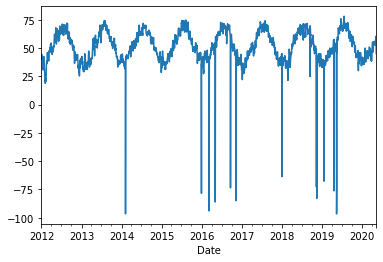

In [43]:
series = temp_index["Weighted Temp"]
series.plot()
#plt.savefig("TempIndex.png")
plt.show()

Identify all outliers that fall more than two standard deviations below the mean and remove them.

In [44]:
outliers = temp_index["Weighted Temp"] < temp_index["Weighted Temp"].mean() - 2*temp_index["Weighted Temp"].std()
index = [i for i, val in enumerate(outliers) if val]

In [45]:
for value in index:
    temp_index["Weighted Temp"][value] =  temp_index["Weighted Temp"][value-5] 

Plot the data again and look for peculiarities.

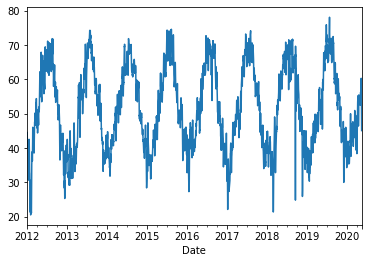

In [46]:
series = temp_index["Weighted Temp"]
series.plot()
#plt.savefig("TempIndex.png")
plt.show()

In [47]:
write_index_path = Path("__file__").parent.joinpath("Manipulated_Data", "Weather_Data").parent.joinpath("Weather_Data", "Temperature Index.csv")
temp_index.to_csv(write_index_path)